In [1]:
############################# 
## Homework Assignment One ##
##     Mollie A. Pepper    ##
## Due 03/24/2022 11:59 PM ##
#############################

In [2]:
# import necessary libraries
import pandas as pd
import numpy as np

In [3]:
# One
data = pd.read_excel('AirQualityUCI.xlsx')

In [4]:
# Two

rowcol = data.shape
print(rowcol)
print("This data frame has", rowcol[1], "columns and", rowcol[0], "rows!")


(9357, 15)
This data frame has 15 columns and 9357 rows!


In [5]:
# Three
print(data.head())

        Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0 2004-03-10  18:00:00     2.6      1360.00       150  11.881723   
1 2004-03-10  19:00:00     2.0      1292.25       112   9.397165   
2 2004-03-10  20:00:00     2.2      1402.00        88   8.997817   
3 2004-03-10  21:00:00     2.2      1375.50        80   9.228796   
4 2004-03-10  22:00:00     1.6      1272.25        51   6.518224   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0        1045.50    166.0       1056.25    113.0       1692.00      1267.50   
1         954.75    103.0       1173.75     92.0       1558.75       972.25   
2         939.25    131.0       1140.00    114.0       1554.50      1074.00   
3         948.25    172.0       1092.00    122.0       1583.75      1203.25   
4         835.50    131.0       1205.00    116.0       1490.00      1110.00   

       T         RH        AH  
0  13.60  48.875001  0.757754  
1  13.30  47.700000  0.725487  
2  11.90  53.975000 

In [6]:
# Four
print(data.dtypes)

Date             datetime64[ns]
Time                     object
CO(GT)                  float64
PT08.S1(CO)             float64
NMHC(GT)                  int64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
dtype: object


In [7]:
# Five 

# Make deep copy of DF
data_cleaned = data.copy(deep = True)

# Replace -200 as missing
data_cleaned = data_cleaned.replace(-200 , np.NaN)
#print number of missings per var
print(data_cleaned.isnull().sum())

# Fill in missings as mean of column
# Used mean because all variables other than date and time are "hourly averaged responses" (per the documentation)
# and date and time series do not contain missing values
data_cleaned['CO(GT)'].fillna(value=data_cleaned['CO(GT)'].mean(), inplace=True)
data_cleaned['PT08.S1(CO)'].fillna(value=data_cleaned['PT08.S1(CO)'].mean(), inplace=True)
data_cleaned['NMHC(GT)'].fillna(value=data_cleaned['NMHC(GT)'].mean(), inplace=True)
data_cleaned['C6H6(GT)'].fillna(value=data_cleaned['C6H6(GT)'].mean(), inplace=True)
data_cleaned['PT08.S2(NMHC)'].fillna(value=data_cleaned['PT08.S2(NMHC)'].mean(), inplace=True)
data_cleaned['NOx(GT)'].fillna(value=data_cleaned['NOx(GT)'].mean(), inplace=True)
data_cleaned['PT08.S3(NOx)'].fillna(value=data_cleaned['PT08.S3(NOx)'].mean(), inplace=True)
data_cleaned['NO2(GT)'].fillna(value=data_cleaned['NO2(GT)'].mean(), inplace=True)
data_cleaned['PT08.S4(NO2)'].fillna(value=data_cleaned['PT08.S4(NO2)'].mean(), inplace=True)
data_cleaned['PT08.S5(O3)'].fillna(value=data_cleaned['PT08.S5(O3)'].mean(), inplace=True)
data_cleaned['T'].fillna(value=data_cleaned['T'].mean(), inplace=True)
data_cleaned['RH'].fillna(value=data_cleaned['RH'].mean(), inplace=True)
data_cleaned['AH'].fillna(value=data_cleaned['AH'].mean(), inplace=True)

# Double check all missings are now replaced
print(data_cleaned.isnull().sum())

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64
Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64


AH and RH have a correlation of .17


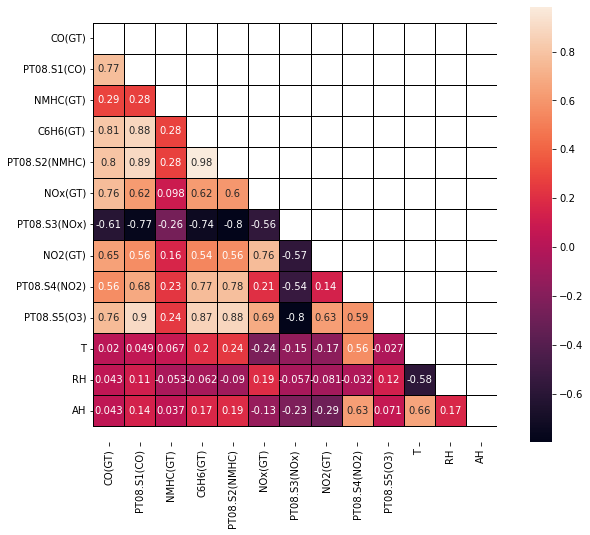

In [8]:
# Six
# import necessary libraries
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

#increase size
plt.figure(figsize = (12,8))

# create matrix
matrix = np.triu(data_cleaned.corr())
mat = sns.heatmap(data_cleaned.corr(), annot = True, square=True, \
            linewidths=1, linecolor='black', mask=matrix)

bottom, top = mat.get_ylim()
mat.set_ylim(bottom + .5, top - .5)

print("AH and RH have a correlation of .17")

In [9]:
# Seven
data_cleaned.drop(["AH"], axis=1, inplace=True)


In [10]:
# Eight
#import libraries
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# creating an instance of LinearRegression class
model = linear_model.LinearRegression()

#standardize vars
scaler = StandardScaler()
independent_vars = scaler.fit_transform(data_cleaned[['CO(GT)','T', 'NMHC(GT)']])

#split into train and test
x_train, x_test, y_train, y_test = train_test_split(independent_vars, data_cleaned["RH"], test_size=0.2, random_state=4)

# fit the data
model.fit(x_train, y_train)

#predict yhat
yhat = model.predict(x_test)
#mse
mse_test = mean_squared_error(y_test,yhat)
print("Test Data MSE:", mse_test)

#train data
y_t_predict = model.predict(x_train)
#mse
mse_train = mean_squared_error(y_train, y_t_predict)
print("Train Data MSE:", mse_train)

r1 = mse_test/mse_train
diff = np.abs(mse_train - mse_test)
change = np.abs((mse_train - mse_test)/mse_train)

print("MSE Ratio:",r1)
print("Difference Between MSEs:",diff)
print("MSE Change:",change)

# R-Squared
r2_test = r2_score(y_test, yhat)
r2_train = r2_score(y_train, y_t_predict)
print('Test Data R-Squared:', r2_test)
print('Train Data R-Squared:', r2_train)


"""
the R-squared for both the test and train data are quite low, indicating that 
the regression line is only a 36% fit for the test data and 33% for the train
data. Thus, the model fits the test data slightly better, but is generally a bad 
fit for both.

The MSE values indicate the difference between the values predicted by the model
and the actual values in the data set (residuals). Though the MSEs are large here, 
we see that the ratio between the test MSE and train MSE is close to one, and the 
difference between the two is about 10, which is around 5%. This indicates that 
the MSEs are pretty similar between the two models.
"""


Test Data MSE: 182.14873167082652
Train Data MSE: 192.62716701314383
MSE Ratio: 0.9456025050630459
Difference Between MSEs: 10.478435342317312
MSE Change: 0.054397494936954144
Test Data R-Squared: 0.36430204314585524
Train Data R-Squared: 0.3322594649584366


'\nthe R-squared for both the test and train data are quite low, indicating that \nthe regression line is only a 36% fit for the test data and 33% for the train\ndata. Thus, the model fits the test data slightly better, but is generally a bad \nfit for both.\n\nThe MSE values indicate the difference between the values predicted by the model\nand the actual values in the data set (residuals). Though the MSEs are large here, \nwe see that the ratio between the test MSE and train MSE is close to one, and the \ndifference between the two is about 10, which is around 5%. This indicates that \nthe MSEs are pretty similar between the two models.\n'